# Prophet 모듈화

## #01. 준비작업

### [1] 패키지 참조

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.timeserise import *

### [2] 데이터 가져오기

In [8]:
origin = my_read_excel("https://data.hossam.kr/tsdata/air_passengers.xlsx", info=False)

## #02. 데이터 전처리

### [1] 데이터 프레임의 필드 이름 변경

prophet 라이브러리의 요구사항에 따라 날짜 필드의 이름을 `ds`로, 데이터의 필드 이름을 `y`로 변경해야 한다.

날짜의 데이터 타입은 `datetime` 형식이어야 한다.

> 날짜 변수가 인덱스가 아님에 유의

In [9]:
df = origin.rename(columns={'Month': 'ds', 'Passengers': 'y'})
my_pretty_table(df.head())

+----+---------------------+-----+
|    | ds                  |   y |
|----+---------------------+-----|
|  0 | 1949-01-01 00:00:00 | 112 |
|  1 | 1949-02-01 00:00:00 | 118 |
|  2 | 1949-03-01 00:00:00 | 132 |
|  3 | 1949-04-01 00:00:00 | 129 |
|  4 | 1949-05-01 00:00:00 | 121 |
+----+---------------------+-----+


### [2] 데이터 분할

In [10]:
train, test = my_timeseries_split(df)
train.shape, test.shape

((115, 2), (29, 2))

## #03. 시계열 학습 모델 구현

### [1] 하이퍼파라미터 정의

In [11]:
params = {
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    # 'weekly_seasonality': [True, False],
    # 'daily_seasonality':  [True, False],
    # 'yearly_seasonality': [True, False],
}

### [2] 기본 호출

11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] start processing
11:02:32 - cmdstanpy - INFO - Chain [1] done processing
11:02:32 - cmdstanpy - INFO - Chain [1] done processing
11:02:32 - cmdstanpy - INFO - Chain [1] done processing
11:02:32 - cmdstanpy - INFO - Chain [1] done processing
11:02:32 - cmdstanpy - INFO - Chain [1] done processing
11:02:32 - cmdstanpy - INFO - Chain [1] done processing
11:02:32 - cmdstanpy - INFO - Chain [1] done processing
11:02:32 - cmdstanpy - INFO - Chain [1

+----+---------------------------+--------------------+---------------------------+---------+
|    |   changepoint_prior_scale | seasonality_mode   |   seasonality_prior_scale |   score |
|----+---------------------------+--------------------+---------------------------+---------|
|  0 |                      0.01 | multiplicative     |                         1 | 18.9519 |
|  1 |                      0.01 | multiplicative     |                       0.1 | 19.1651 |
|  2 |                       0.1 | multiplicative     |                       0.1 | 26.5661 |
|  3 |                       0.1 | multiplicative     |                         1 | 29.1173 |
|  4 |                         1 | multiplicative     |                       0.1 | 30.1484 |
|  5 |                         1 | multiplicative     |                         1 | 31.7792 |
|  6 |                       0.1 | multiplicative     |                      0.01 | 34.3392 |
|  7 |                         1 | multiplicative     |     

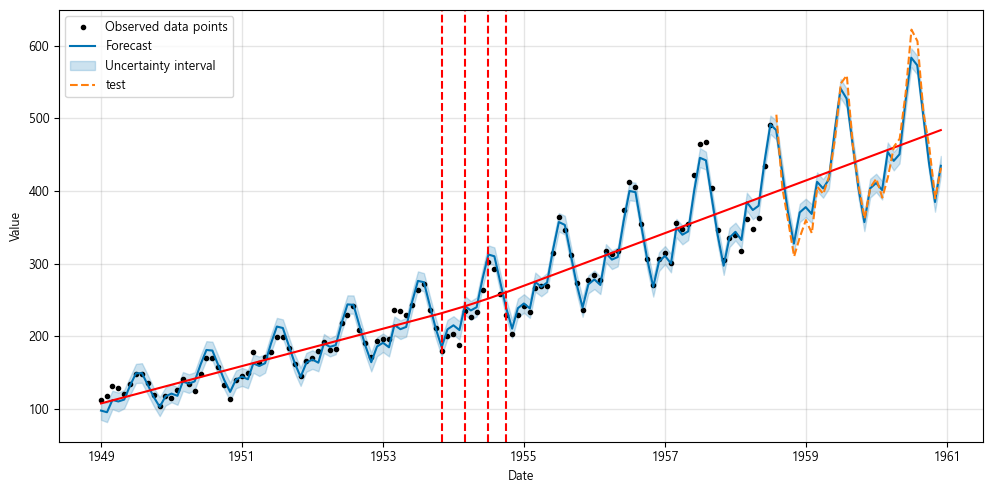

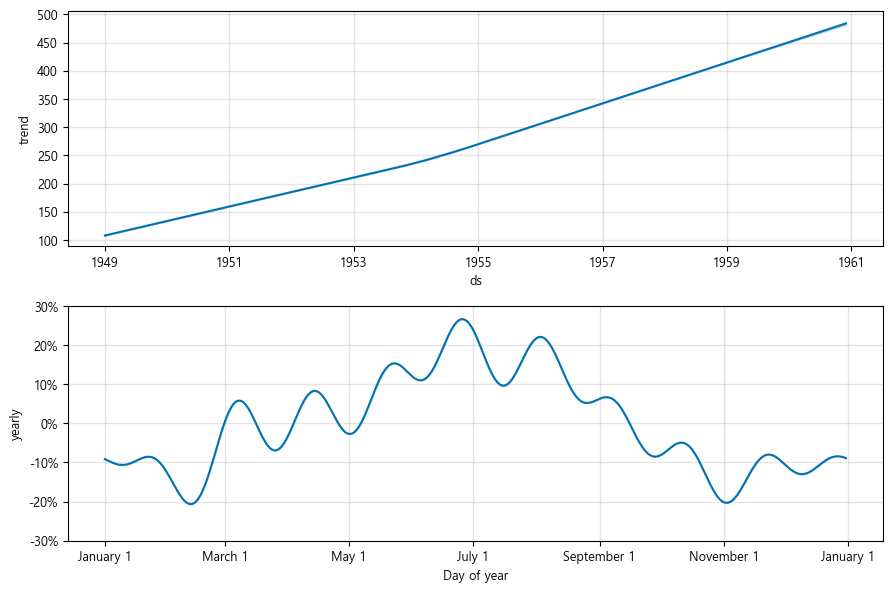

+-----+---------------------+---------+--------------+--------------+---------------+---------------+------------------------+------------------------------+------------------------------+-------------+----------------+----------------+------------------+------------------------+------------------------+---------+
|     | ds                  |   trend |   yhat_lower |   yhat_upper |   trend_lower |   trend_upper |   multiplicative_terms |   multiplicative_terms_lower |   multiplicative_terms_upper |      yearly |   yearly_lower |   yearly_upper |   additive_terms |   additive_terms_lower |   additive_terms_upper |    yhat |
|-----+---------------------+---------+--------------+--------------+---------------+---------------+------------------------+------------------------------+------------------------------+-------------+----------------+----------------+------------------+------------------------+------------------------+---------|
|   0 | 1949-01-01 00:00:00 | 107.923 |       85.351

In [12]:
model, param, score, forecast, pred = my_prophet(train, test, freq="M", **params)